# problem d
                    A	     B        C
        Test_Err    0.02	 0.021	 0.034
      Train _Err	0.0023	0.00	0.0065


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
# Loading the data (cat/non-cat)
X_train = np.loadtxt(r"D:/2021spring/statistic compute with python/hw08/Gisette/gisette_train.data")
Y_train = np.loadtxt(R"D:/2021spring/statistic compute with python/hw08/Gisette/gisette_train.labels")
X_test = np.loadtxt(r"D:/2021spring/statistic compute with python/hw08/Gisette/gisette_valid.data")
Y_test = np.loadtxt(r"D:/2021spring/statistic compute with python/hw08/Gisette/gisette_valid.labels")

In [3]:
m_train,num_input = X_train.shape # train data size
m_test,n_test = X_test.shape   # test data size
print(m_train,num_input,m_test,n_test)

6000 5000 1000 5000


In [4]:
# normalize  and mat data
X_train = tf.constant(X_train, dtype=tf.float32)
mean, variance = tf.nn.moments(X_train, axes=[0])
X_train_norm = (X_train-mean)/tf.sqrt(variance+1e-8)
X_test_norm = (X_test-mean)/tf.sqrt(variance+1e-8)

In [5]:
# check the train data mean and var
mean1, variance1 = tf.nn.moments(X_train_norm, axes=[0])
print(mean1,variance1)

tf.Tensor(
[ 3.2175581e-07 -3.4117201e-07  2.6186306e-08 ... -2.0798048e-07
  3.1510990e-07  2.6520092e-07], shape=(5000,), dtype=float32) tf.Tensor([0.9999922  0.99996746 0.9999737  ... 1.0001194  1.0000769  0.9998869 ], shape=(5000,), dtype=float32)


In [42]:
# Define loss function
def custom_loss(y_true,y_pred):
    tend=1-tf.multiply(y_true,y_pred) # 1- y_i * y_pred_i
    tend=tf.maximum(0.0,tend) # max(0,1-y*y_pred)
    tend=tf.square(tend) #max(0,1-y*y_pred)^2
    tend=tf.math.log(1+tend)
    return tf.reduce_mean(tend)

In [53]:
# Define the neural network model with y_pred = x.T * W
lambda_w = 0.0001
inputs = tf.keras.Input(shape=(num_input,)) # input layer
#norm_input = tf.keras.layers.experimental.preprocessing.Normalization()(inputs) #normalize data
outputs = tf.keras.layers.Dense(1, # only 1 output  
                                activation="linear", #y = wx+b 
                                kernel_initializer='zeros', # for W(0)=0
                                use_bias=False, # for x_i.^*W. If true, y_pred=x_i.^*W+b
                                activity_regularizer=tf.keras.regularizers.L2(lambda_w) # for 'lambda W.T*W'
                                )(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="ting_model")

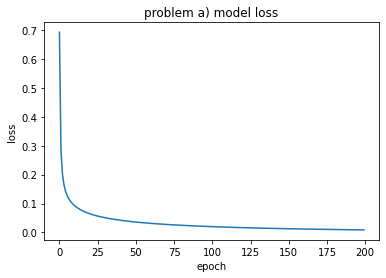

In [44]:
# Define the optimizer
model.compile(
    # Optimizer SGD, adjust the learning rate \eta and momentum here. Momentum =0 means vanilla GD
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0),  
    # Loss function to minimize
    loss=custom_loss
)

# train the model

# specify the batch size and epoch (iteration) number here
result_a = model.fit(X_train_norm, Y_train, batch_size=m_train, epochs=200,verbose=0) 

#plot the result
plt.plot(result_a.history['loss'])
plt.title('problem a) model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [45]:
y_test_pred = tf.math.sign(model.predict(X_test_norm))
ERR_test_a = np.mean(abs(Y_test-y_test_pred[:,0])/2)
y_train_pred = tf.math.sign(model.predict(X_train_norm))
ERR_train_a = np.mean(abs(Y_train-y_train_pred[:,0])/2)
print('problem a)')
print('test ERR is: ',ERR_test_a)
print('train ERR is: ',ERR_train_a)

problem a)
test ERR is:  0.02
train ERR is:  0.0023333333


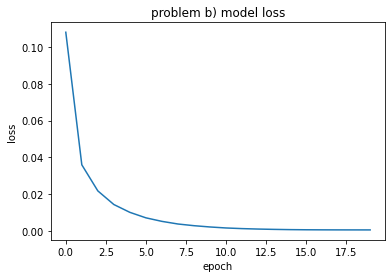

In [50]:
# Define the optimizer
model.compile(
    # Optimizer SGD, adjust the learning rate \eta and momentum here. Momentum =0 means vanilla GD
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0),  
    # Loss function to minimize
    loss=custom_loss
)

#train the model
result_b = model.fit(X_train_norm, Y_train, batch_size=128, epochs=20,verbose=0) 

#plot the result
plt.plot(result_b.history['loss'])
plt.title('problem b) model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [52]:
y_test_pred = tf.math.sign(model.predict(X_test_norm))
ERR_test_b = np.mean(abs(Y_test-y_test_pred[:,0])/2)
y_train_pred = tf.math.sign(model.predict(X_train_norm))
ERR_train_b = np.mean(abs(Y_train-y_train_pred[:,0])/2)
print('problem b)')
print('test ERR is: ',ERR_test_b)
print('train ERR is: ',ERR_train_b)

problem b)
test ERR is:  0.021
train ERR is:  0.0


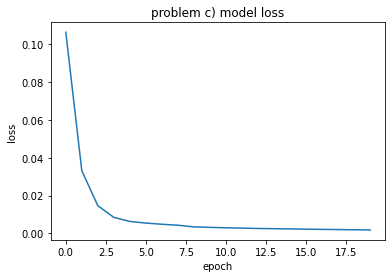

In [54]:
# Define the optimizer
model.compile(
    # Optimizer SGD, adjust the learning rate \eta and momentum here. Momentum =0 means vanilla GD
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),  
    # Loss function to minimize
    loss=custom_loss
)

#train the model
result_c = model.fit(X_train_norm, Y_train, batch_size=128, epochs=20,verbose=0) 

#plot the result

plt.plot(result_c.history['loss'])
plt.title('problem c) model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [55]:
y_test_pred = tf.math.sign(model.predict(X_test))
ERR_test_c = np.mean(abs(Y_test-y_test_pred[:,0])/2)
y_train_pred = tf.math.sign(model.predict(X_train))
ERR_train_c = np.mean(abs(Y_train-y_train_pred[:,0])/2)
print('problem c)')
print('test ERR is: ',ERR_test_c)
print('train ERR is: ',ERR_train_c)

problem c)
test ERR is:  0.034
train ERR is:  0.0065
